# Coding a Neuron

Time to implement a neuron! We’ll use NumPy, a popular and powerful computing library for Python, to help us do math:

In [ ]:
import numpy as np

# To complete
def sigmoid(x):
  # Our activation function: f(x) = 1 / (1 + e^(-x))
  res= 1 / (1+np.exp(-x))
               # To complete

  return res

class Neuron:
  def __init__(self, weights, bias):
    self.weights = weights
    self.bias = bias

  # To complete
  def feedforward(self, inputs):
    # Weight inputs, add bias, then use the activation function
    res = sigmoid( np.dot(self.weights,inputs) + self.bias )

    return res

In [ ]:
weights = np.array([0, 1]) # w1 = 0, w2 = 1
bias = 4                   # b = 0
n = Neuron(weights, bias)

x = np.array([2, 3])       # x1 = 2, x2 = 3
print(n.feedforward(x))    # Expected result : 0.9990889488055994

0.9990889488055994


Recognize those numbers? That’s the example we just did! We get the same answer of 0.999.

In [ ]:
# ... code from previous section here

class OurNeuralNetwork:
  '''
  A neural network with:
    - 2 inputs
    - a hidden layer with 2 neurons (h1, h2)
    - an output layer with 1 neuron (o1)
  Each neuron has the same weights and bias:
    - w = [0, 1]
    - b = 0
  '''
  def __init__(self):
    weights = np.array([0, 1])
    bias = 0

    # The Neuron class here is from the previous section
    self.h1 = Neuron(weights, bias)
    self.h2 = Neuron(weights, bias)
    self.o1 = Neuron(weights, bias)

  # To complete
  def feedforward(self, x):
    out_h1 = self.h1.feedforward(x)# To complete
    out_h2 = self.h2.feedforward(x)# To complete

    # The inputs for o1 are the outputs from h1 and h2
    out_o1 = self.o1.feedforward(np.array([out_h1,out_h2]) )# To complete
    # np.array cause feedforward takes an array as input
    return out_o1


In [ ]:
network = OurNeuralNetwork()
x = np.array([2, 3])
print(network.feedforward(x)) # 0.7216325609518421

0.7216325609518421


We got 0.7216 again! Looks like it works.

# MSE Loss
Here’s some code to calculate loss for us:

In [ ]:
# To complete
def mse_loss(y_true, y_pred):
  # y_true and y_pred are numpy arrays of the same length.
  somme = 0
  for i in range(len(y_true)) :
    somme += (y_true[i] - y_pred[i]) ** 2
  mse = 1/len(y_true) * somme # To complete
  # OR correction prof : ((y_true - y_pred) ** 2).mean()
                      # = 1/n * somme((yi - yi pred) **2)

  return mse

y_true = np.array([1, 0, 0, 1])
y_pred = np.array([0, 0, 0, 0])

print(mse_loss(y_true, y_pred)) # 0.5

0.5


# A Complete Neural Network

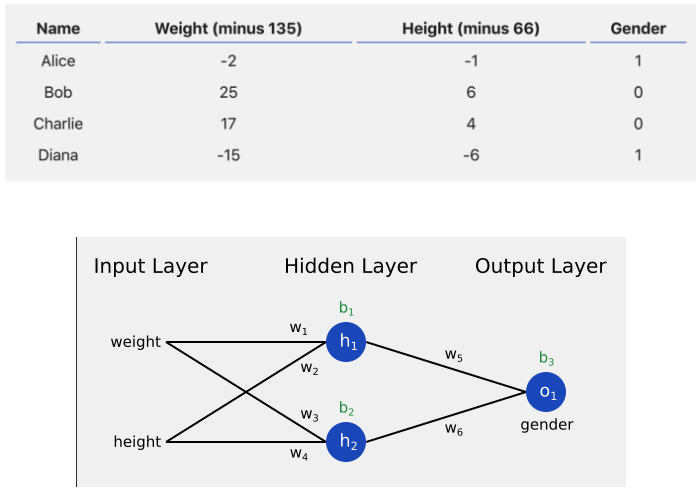

In [ ]:
Image('Capture d’écran 2022-09-09 à 16.10.47.png')

In [ ]:
# To complete
def deriv_sigmoid(x):
  # Derivative of sigmoid: f'(x) = f(x) * (1 - f(x))

  return sigmoid(x) * (1 - sigmoid(x))

class OurNeuralNetwork:
  '''
  A neural network with:
    - 2 inputs
    - a hidden layer with 2 neurons (h1, h2)
    - an output layer with 1 neuron (o1)
  *** DISCLAIMER ***:
  The code below is intended to be simple and educational, NOT optimal.
  Real neural net code looks nothing like this. DO NOT use this code.
  Instead, read/run it to understand how this specific network works.
  '''
  def __init__(self):
    # Weights
    self.w1 = np.random.normal()
    self.w2 = np.random.normal()
    self.w3 = np.random.normal()
    self.w4 = np.random.normal()
    self.w5 = np.random.normal()
    self.w6 = np.random.normal()

    # Biases
    self.b1 = np.random.normal()
    self.b2 = np.random.normal()
    self.b3 = np.random.normal()

  # To complete
  # The Neuron class here is from the previous section
    self.h1 = Neuron(weights, bias)
    self.h2 = Neuron(weights, bias)
    self.o1 = Neuron(weights, bias)

  def feedforward(self, x): #To complete
    # x is a numpy array with 2 elements.
    out_h1 = self.h1.feedforward(x)
    out_h2 = self.h2.feedforward(x)

    # The inputs for o1 are the outputs from h1 and h2
    o1 = self.o1.feedforward(np.array([out_h1,out_h2]) )
    return o1

  def train(self, data, all_y_trues):
    '''
    - data is a (n x 2) numpy array, n = # of samples in the dataset.
    - all_y_trues is a numpy array with n elements.
      Elements in all_y_trues correspond to those in data.
    '''
    learn_rate = 0.1
    epochs = 1000 # number of times to loop through the entire dataset

    for epoch in range(epochs):
      for x, y_true in zip(data, all_y_trues):
        # --- Do a feedforward (we'll need these values later)
        sum_h1 = self.w1 * x[0] + self.w2 * x[1] + self.b1  # To complete
        h1 = sigmoid(sum_h1)  # To complete

        sum_h2 = self.w3 * x[0] + self.w4 * x[1] + self.b2  # To complete
        h2 = sigmoid(sum_h2)# To complete

        sum_o1 = self.w5 * h1 + self.w6 * h2 + self.b3  # To complete
        o1 = sigmoid(sum_o1)# To complete
        y_pred = o1# To complete

        # --- Calculate partial derivatives.
        # --- Naming: d_L_d_w1 represents "partial L / partial w1"
            # ((y_true - y_pred) ** 2).mean()
        d_L_d_ypred = -2 * (y_true-y_pred) # To complete

        # Neuron o1
        d_ypred_d_w5 = h1 * deriv_sigmoid(sum_o1) # self.h1 * deriv_sigmoid(self.w5*self.h1 + self.w6*self.h2 + self.b3)# To complete
        d_ypred_d_w6 = h2 * deriv_sigmoid(sum_o1) # self.h2 * deriv_sigmoid(self.w5*self.h1 + self.w6*self.h2 + self.b3)# To complete
        d_ypred_d_b3 = deriv_sigmoid(sum_o1) # To complete

        d_ypred_d_h1 = self.w5 * deriv_sigmoid(sum_o1) # self.w5 * deriv_sigmoid(self.w5*self.h1 + self.w6*self.h2 + self.b3)# To complete
        d_ypred_d_h2 = self.w6 * deriv_sigmoid(sum_o1) # self.w6 * deriv_sigmoid(self.w5*self.h1 + self.w6*self.h2 + self.b3)# To complete

        # Neuron h1
        d_h1_d_w1 = x[0] * deriv_sigmoid(sum_h1) # x[0] * deriv_sigmoid(self.w1*self.x[0] + self.w2*self.x[1] + self.b1)# To complete
        d_h1_d_w2 = x[1] * deriv_sigmoid(sum_h1) # x[1] * deriv_sigmoid(self.w1*self.x[0] + self.w2*self.x[1] + self.b1)# To complete
        d_h1_d_b1 =  deriv_sigmoid(sum_h1) # To complete

        # Neuron h2
        d_h2_d_w3 = x[0] * deriv_sigmoid(sum_h2) # x[0] * deriv_sigmoid(self.w3*self.x[0] + self.w4*self.x[1] + self.b2)# To complete
        d_h2_d_w4 = x[1] * deriv_sigmoid(sum_h2) # x[1] * deriv_sigmoid(self.w3*self.x[0] + self.w4*self.x[1] + self.b2)# To complete
        d_h2_d_b2 = deriv_sigmoid(sum_h2) # To complete

        # --- Update weights and biases
        # Neuron h1
        self.w1 -= learning_rate * d_L_d_ypred *  # To complete
        self.w2 -= # To complete
        self.b1 -= # To complete

        # Neuron h2
        self.w3 -= # To complete
        self.w4 -= # To complete
        self.b2 -= # To complete

        # Neuron o1
        self.w5 -= # To complete
        self.w6 -= # To complete
        self.b3 -= learning_rate * d_L_d_ypred * # To complete

      # --- Calculate total loss at the end of each epoch
      if epoch % 10 == 0:
        y_preds = np.apply_along_axis(self.feedforward, 1, data)
        loss = mse_loss(all_y_trues, y_preds)
        print("Epoch %d loss: %.3f" % (epoch, loss))

# Define dataset
data = np.array([
  [-2, -1],  # Alice
  [25, 6],   # Bob
  [17, 4],   # Charlie
  [-15, -6], # Diana
])
all_y_trues = np.array([
  1, # Alice
  0, # Bob
  0, # Charlie
  1, # Diana
])

# Train our neural network!
network = OurNeuralNetwork()
network.train(data, all_y_trues)

We can now use the network to predict genders:

In [ ]:
# Make some predictions
emily = np.array([-7, -3]) # 128 pounds, 63 inches
frank = np.array([20, 2])  # 155 pounds, 68 inches
print("Emily: %.3f" % network.feedforward(emily)) # 0.951 - F
print("Frank: %.3f" % network.feedforward(frank)) # 0.039 - M